In [1]:
import pyportlib
pyportlib.set_client_dir()
update_data = False

# Portfolio Summary Example

In [2]:
ptf = pyportlib.Portfolio(account='questrade_tfsa', currency="CAD")
benchmark = pyportlib.Portfolio(account='bench_tfsa', currency='CAD')

q = pyportlib.QuestradeConnection(account_name='tfsa')

ERROR:root:no market value computed for LGND
ERROR:root:no market value computed for BPY.UN.TO


In [3]:
if update_data:
    ptf.update_data(fundamentals_and_dividends=False)
    benchmark.update_data(fundamentals_and_dividends=False)

In [4]:
if update_data:
    q.update_transactions(ptf)

## 3-Month Returns

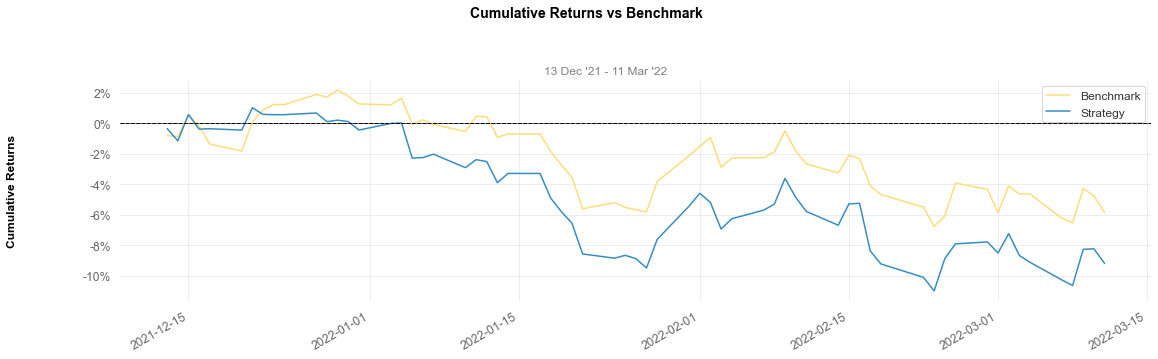

In [5]:
figsize = (16, 5)
pyportlib.plots.returns(ptf, lookback='3m', benchmark=benchmark, figsize=figsize)

## 6-Month Returns

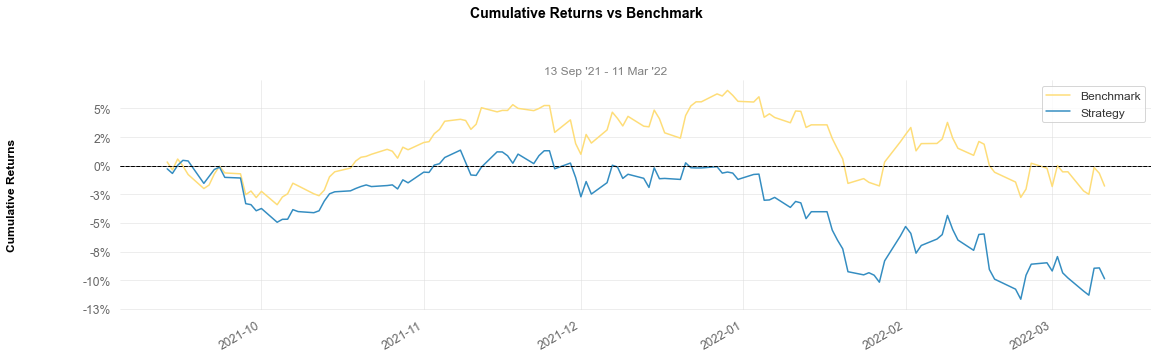

In [6]:
pyportlib.plots.returns(ptf, lookback='6m', benchmark=benchmark, figsize=figsize)

## 1-Year Returns

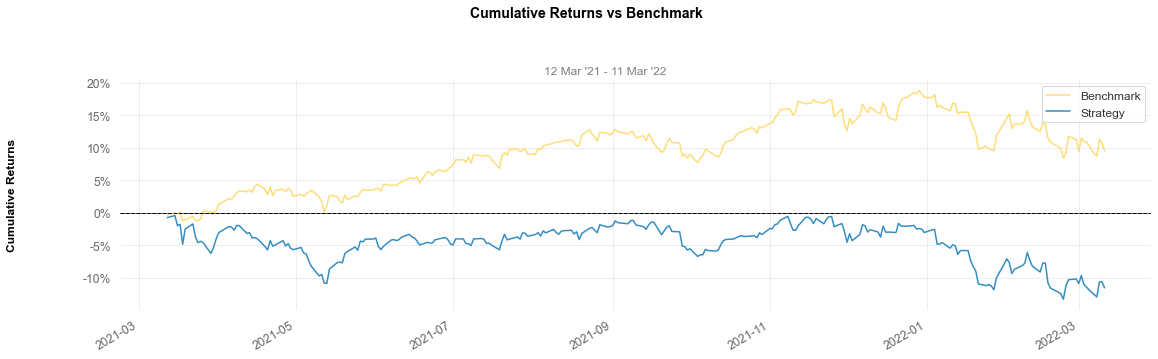

In [7]:
pyportlib.plots.returns(ptf, lookback='1y', benchmark=benchmark, figsize=figsize)

## 5-Year Returns

ERROR:root:no data for BPY.UN.TO, pnl not computed


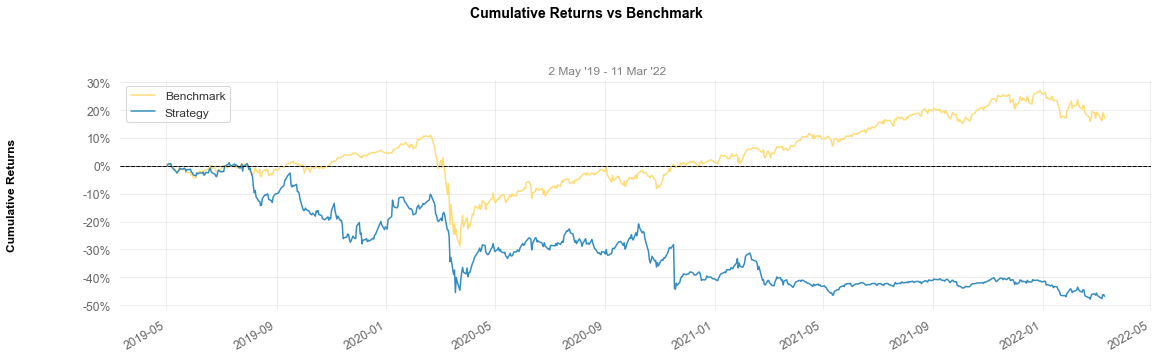

In [8]:
pyportlib.plots.returns(ptf, lookback='5y', benchmark=benchmark, figsize=figsize)

## Rolling Volatility

ERROR:root:no data for BPY.UN.TO, pnl not computed


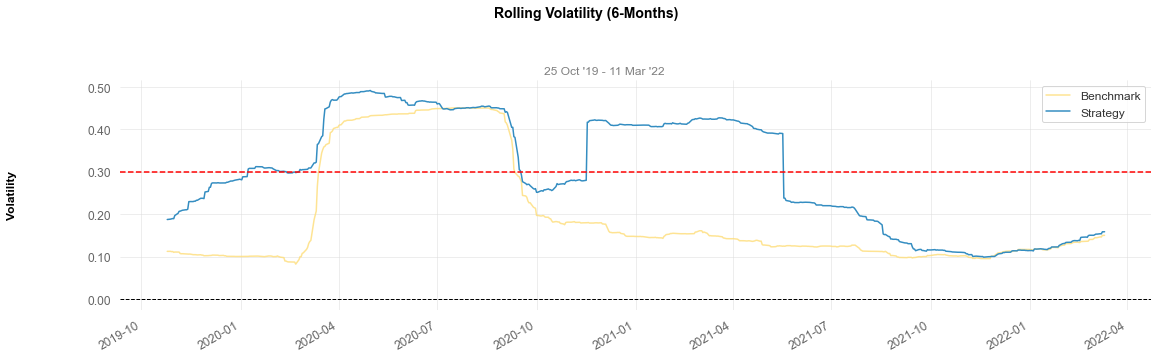

In [9]:
pyportlib.plots.rolling_vol(ptf, lookback='5y', benchmark=benchmark, figsize=figsize)

## Rolling Beta

ERROR:root:no data for BPY.UN.TO, pnl not computed


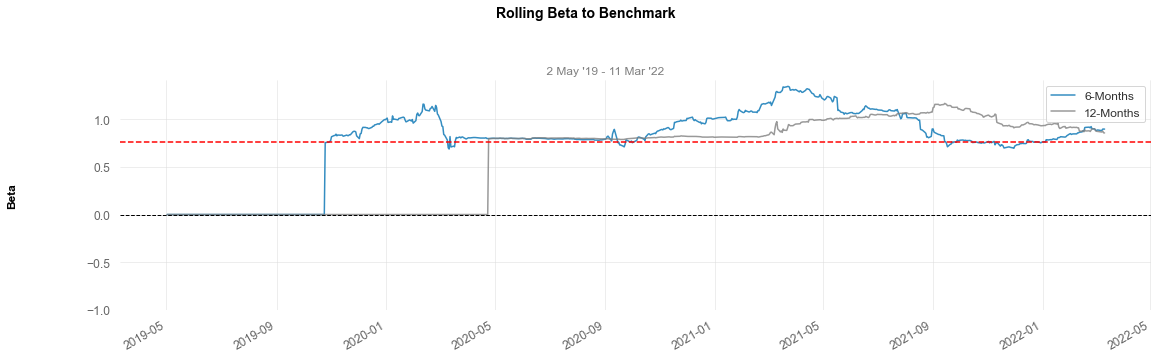

In [10]:
pyportlib.plots.rolling_beta(ptf, lookback='5y', benchmark=benchmark, figsize=figsize)

## Rolling alpha

ERROR:root:no data for BPY.UN.TO, pnl not computed


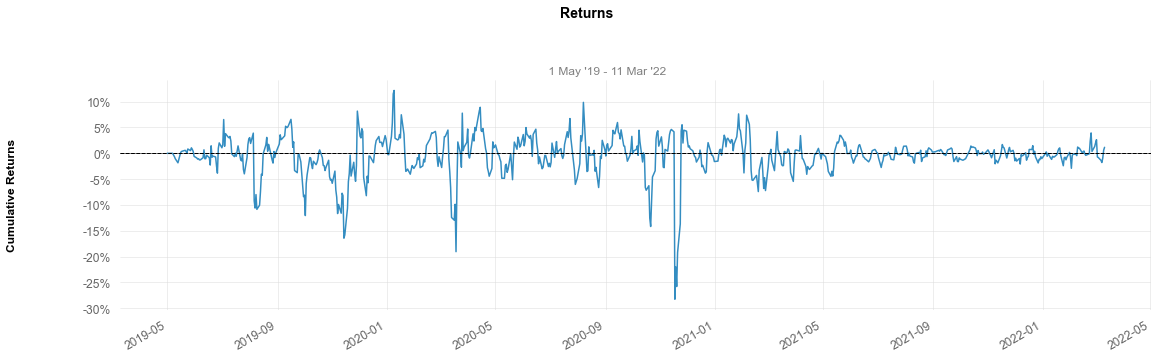

ERROR:root:no data for BPY.UN.TO, pnl not computed


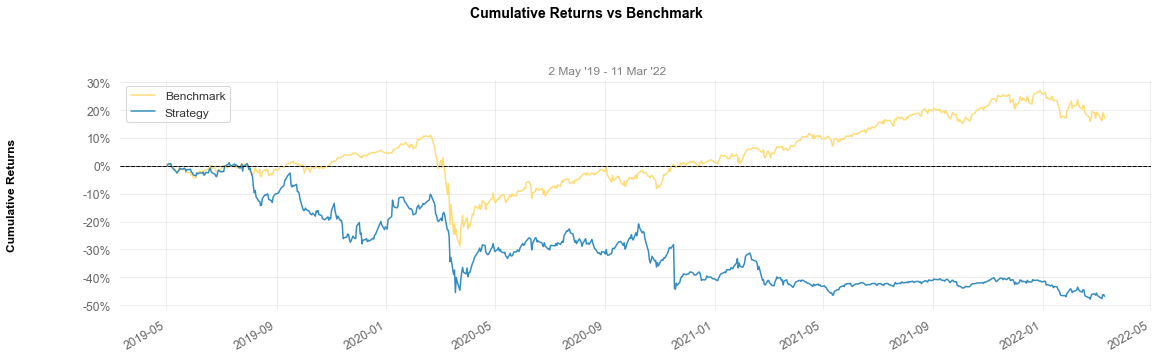

In [11]:
rolling_alpha = pyportlib.stats.rolling_alpha(ptf, lookback='5y', benchmark=benchmark, rolling_period=5)
pyportlib.plots.returns(rolling_alpha, lookback='5y', figsize=figsize, compound=False)
pyportlib.plots.returns(ptf, lookback='5y', benchmark=benchmark, figsize=figsize)

## Rolling Sharpe

ERROR:root:no data for BPY.UN.TO, pnl not computed


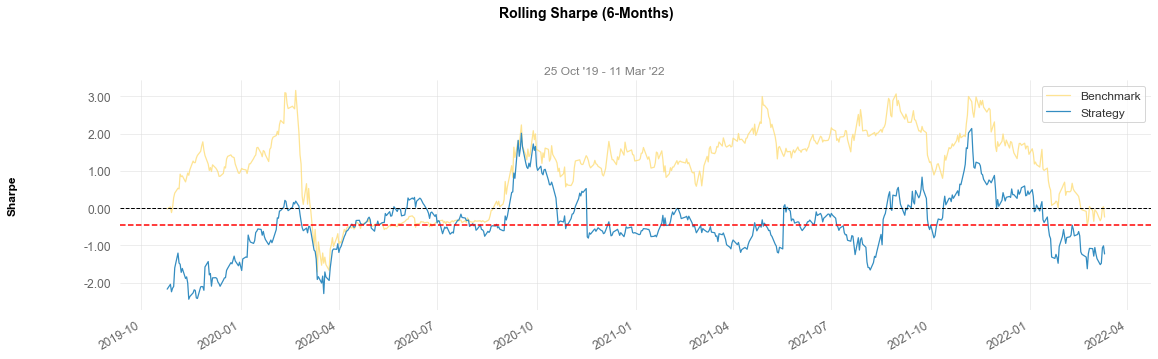

In [12]:
pyportlib.plots.rolling_sharpe(ptf, lookback='5y', benchmark=benchmark, figsize=figsize)

## Returns distribution

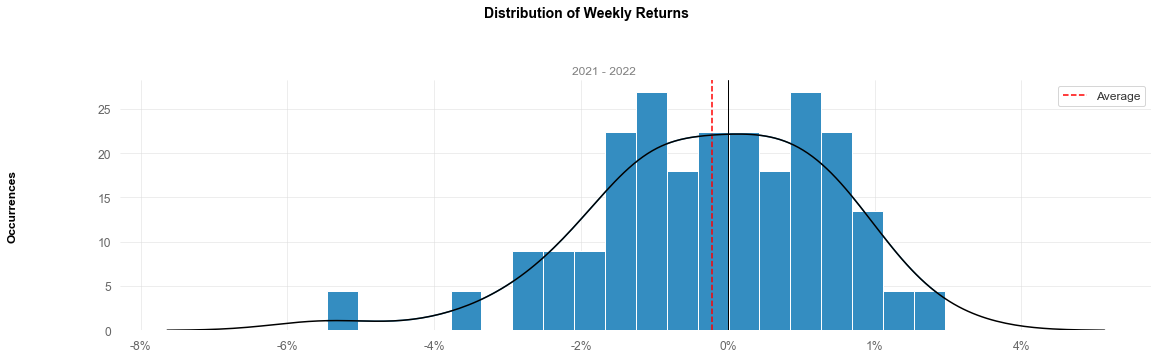

In [13]:
pyportlib.plots.distribution(ptf, lookback='1y', figsize=figsize, resample='W')

## Stats

In [14]:
lookback = '1y'
print(f"{lookback} skewness: {pyportlib.stats.skew(ptf, lookback=lookback)}")
print(f"{lookback} kurtosis: {pyportlib.stats.kurtosis(ptf, lookback=lookback)}")
print(f"{lookback} vol: {pyportlib.stats.annualized_volatility(ptf, lookback=lookback)}")
print(f"{lookback} beta: {pyportlib.stats.beta(ptf, benchmark=benchmark, lookback=lookback)}")
print(f"{lookback} alpha: {pyportlib.stats.alpha(ptf, benchmark=benchmark, lookback=lookback)}")

1y skewness: -0.09763544830694022
1y kurtosis: 1.1508228087712453
1y vol: 0.14502554286847905
1y beta: 0.8776529500539776
1y alpha: -0.1993476597864423


## Correlation Clusters

<AxesSubplot:>

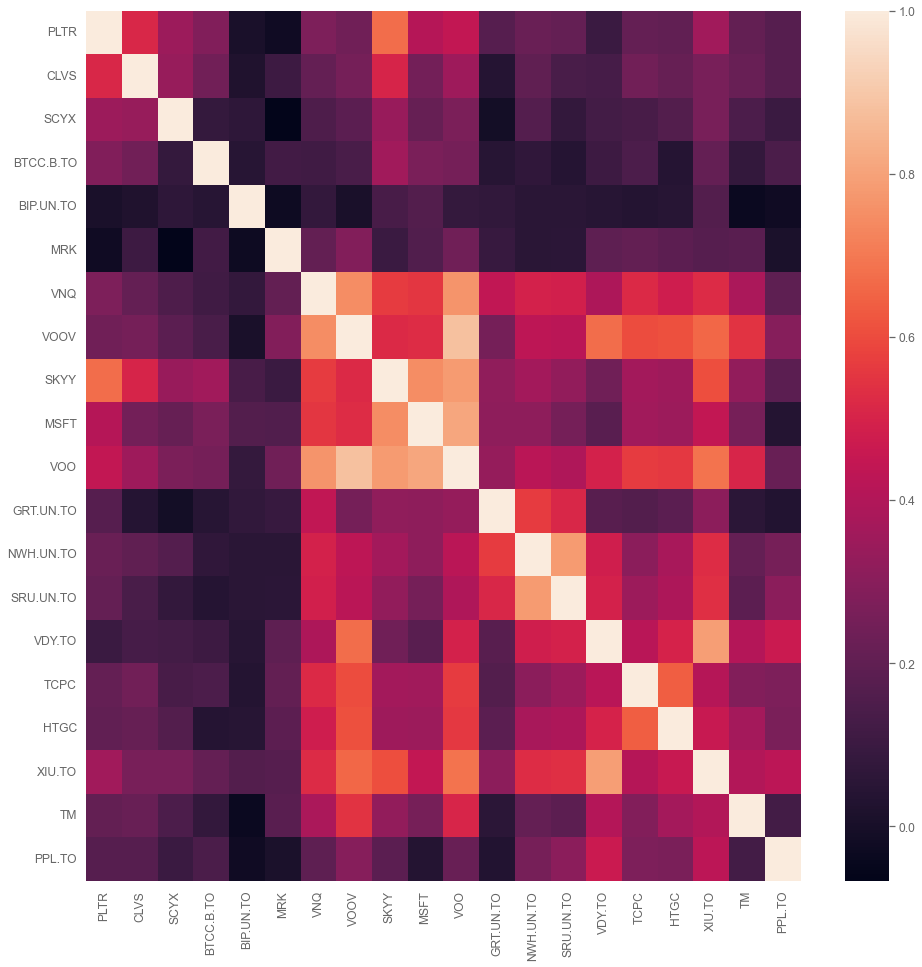

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

corr_mat = pyportlib.stats.cluster_corr(ptf.corr(date=datetime(2022, 3, 11)))

plt.figure(figsize = (16,16))
sns.heatmap(corr_mat)

## Portfolio earnings

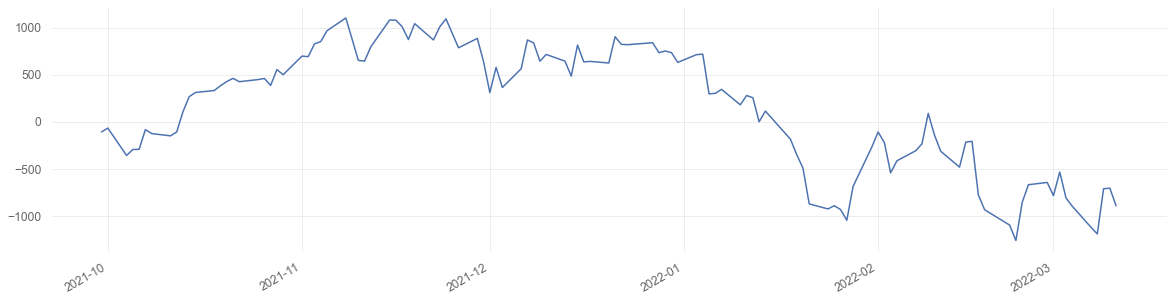

In [16]:
dol_rets = ptf.daily_total_pnl(start_date=datetime(2021, 9, 30)).sum(axis=1).cumsum().plot(figsize=(20, 5))